In [97]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import keras_tuner as kt

### Using keras to load the mnist fashion dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [75]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [76]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [77]:
# Splitting data into training and validation datasets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [78]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,))

In [79]:
X_train.dtype

dtype('uint8')

In [80]:
X_train[1][1]

array([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
       255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
         0,   0], dtype=uint8)

#### Scaling the pixel values

In [81]:
X_train, X_valid, X_test = X_train/255.,X_valid/255., X_test/255.

In [82]:
X_train[1][1]

array([0.        , 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
       0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
       1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
       0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [83]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [70]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [41]:
class_names[y_train[7]]

'Pullover'

In [39]:
y_train.dtype

dtype('uint8')

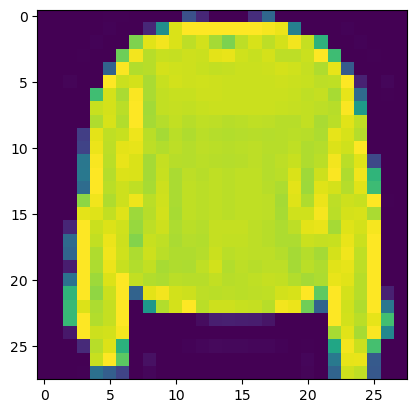

In [44]:
plt.imshow(X_train[7])

### Creating  a Model using sequential API

In [71]:
INPUT_SIZE=X_train[1].shape
INPUT_SIZE

(28, 28)

In [48]:
tf.random.set_seed(123)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = INPUT_SIZE),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_1.layers

In [50]:
model_1.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [51]:
history_1 = model_1.fit(X_train,
                       y_train,
                       epochs=30,
                       validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4818 - accuracy: 0.8274 - val_loss: 0.3777 - val_accuracy: 0.8624
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3645 - accuracy: 0.8672 - val_loss: 0.3609 - val_accuracy: 0.8668
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3283 - accuracy: 0.8786 - val_loss: 0.3361 - val_accuracy: 0.8764
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3027 - accuracy: 0.8878 - val_loss: 0.3302 - val_accuracy: 0.8738
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2843 - accuracy: 0.8942 - val_loss: 0.3295 - val_accuracy: 0.8874
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2710 - accuracy: 0.8984 - val_loss: 0.3193 - val_accuracy: 0.8854
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2586 - accuracy: 0.9022 - val_loss: 0.3327 - val_accuracy:

In [61]:
def plot_history(history):
    pd.DataFrame(history.history).plot(
    figsize=(16,10),
    xlim=[history.epoch[0], history.epoch[-1]],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=['r--','r--','b-','b-*'])
    plt.show;

In [62]:
history_1.epoch[-1]

29

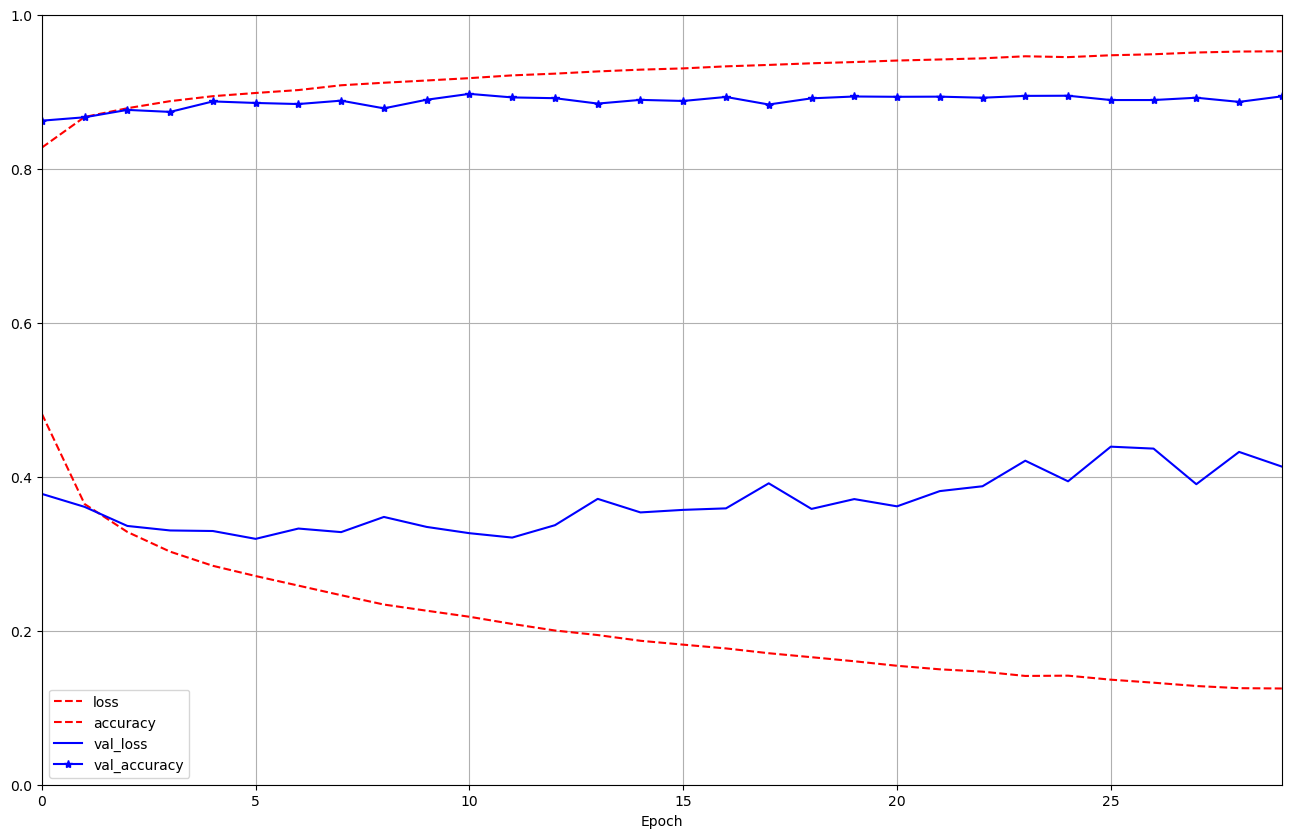

In [63]:
plot_history(history_1)

In [84]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.8900


[0.4500061869621277, 0.8899999856948853]

In [86]:
X_new = X_test[:4]
y_proba = model_1.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 21ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1], dtype=int64)

In [88]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')

In [89]:
y_new = y_test[:4]
y_new

array([9, 2, 1, 1], dtype=uint8)

In [90]:
model_1.save("Fashion_mnist_tf_model_1",save_format="tf")

INFO:tensorflow:Assets written to: Fashion_mnist_tf_model_1\assets


INFO:tensorflow:Assets written to: Fashion_mnist_tf_model_1\assets


In [92]:
model_1.save("Fashion_mnist_tf_model_1",save_format="h5")

### Using Callbacks


In [99]:
tf.random.set_seed(123)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = INPUT_SIZE),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


In [101]:
model_2.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
               metrics=['accuracy'])

In [102]:
checkpoints_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)

early_Stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)


In [103]:
history_2 = model_2.fit(X_train,
                       y_train,
                       epochs=50,
                       validation_data=(X_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6528 - accuracy: 0.7851 - val_loss: 0.4432 - val_accuracy: 0.8414
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4262 - accuracy: 0.8509 - val_loss: 0.3999 - val_accuracy: 0.8588
Epoch 3/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3846 - accuracy: 0.8653 - val_loss: 0.3773 - val_accuracy: 0.8616
Epoch 4/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3576 - accuracy: 0.8728 - val_loss: 0.3527 - val_accuracy: 0.8732
Epoch 5/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3377 - accuracy: 0.8804 - val_loss: 0.3448 - val_accuracy: 0.8730
Epoch 6/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3232 - accuracy: 0.8855 - val_loss: 0.3374 - val_accuracy: 0.8782
Epoch 7/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3071 - accuracy: 0.8913 - val_loss: 0.3228 - val_accuracy:

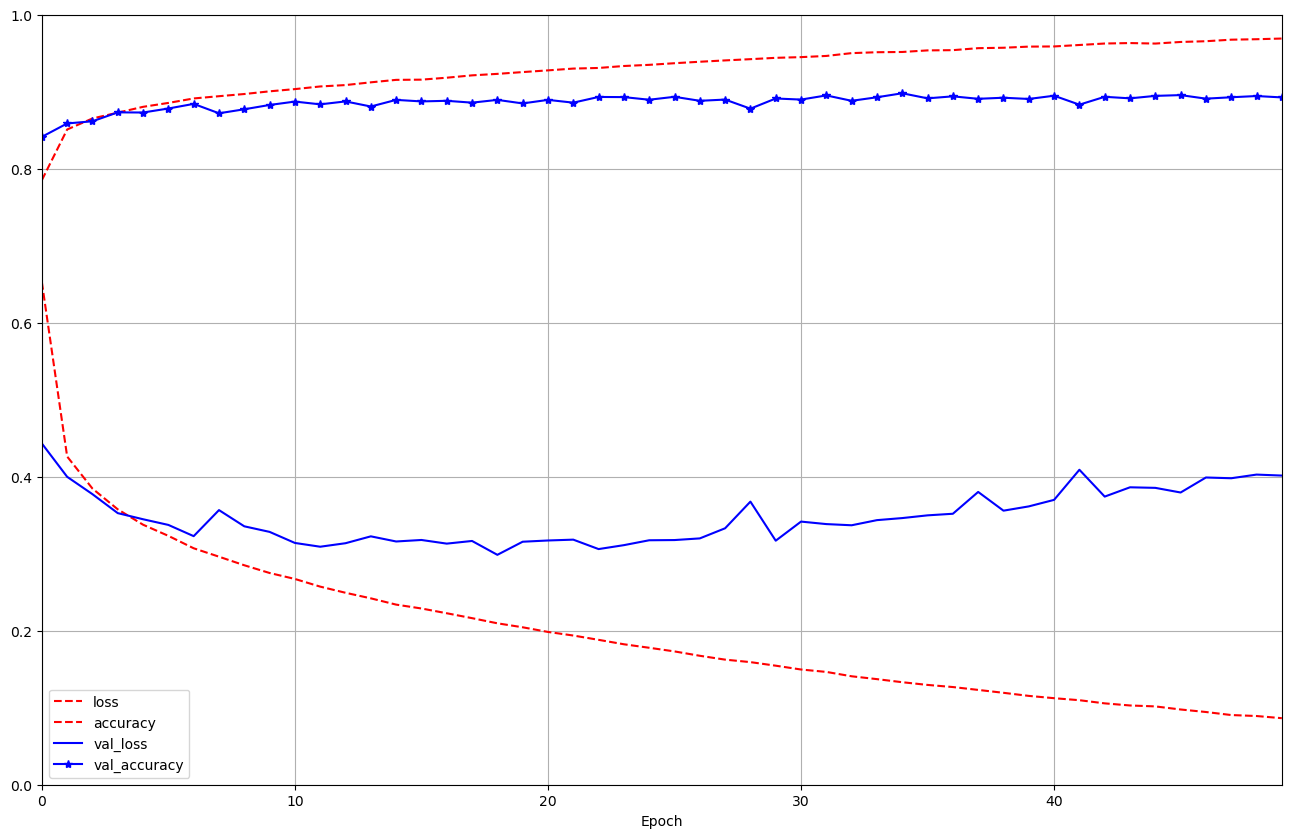

In [104]:
plot_history(history_2)

In [105]:
model_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8882


[0.43257153034210205, 0.8881999850273132]

### Fine Tuning Hyperparameters

In [107]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    
    if optimizer=="sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
        
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=['accuracy'])
    
    return model
    

In [109]:
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_fashion_mnist",
    project_name="my_rnd_search",
    seed=123)

random_search_tuner.search(X_train,y_train,epochs=10,
                          validation_data=(X_valid,y_valid))

Trial 5 Complete [00h 00m 26s]
val_accuracy: 0.8578000068664551

Best val_accuracy So Far: 0.8578000068664551
Total elapsed time: 00h 03m 02s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Not the result we wanted but we move on